In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Example 2: Deep Neural Network

In [8]:
class DeepNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(1, 3)  # Input to hidden layer
        self.output_1 = nn.Linear(3, 1)

        self.linear_2 = nn.Linear(1, 3)  # Hidden to output layer
        self.output_2 = nn.Linear(3, 1)  # Hidden to output layer

    def forward(self, x):
        # Layer 1
        pre_act_1 = self.linear_1(x)
        hidden_1 = F.relu(pre_act_1)

        # Output 1
        output_1 = self.output_1(hidden_1)

        # Layer 2
        pre_act_2 = self.linear_2(output_1)
        hidden_2 = F.relu(pre_act_2)

        # Output layer
        output_2 = self.output_2(hidden_2)

        return output_2, pre_act_1, hidden_1, output_1, pre_act_2, hidden_2
    

deep_model = DeepNN()

x = torch.tensor([[1.0]], dtype=torch.float32)

output, *_ = deep_model(x)

print(output)

tensor([[-0.3202]], grad_fn=<AddmmBackward0>)


In [9]:
theta10, theta11 = -0.2, 1.0
theta20, theta21 = 1.2, -1.5
theta30, theta31 = -2.0, 5.0

beta10, beta11 = -0.2, 1.0
beta20, beta21 = 1.2, -1.5
beta30, beta31 = -2.0, 5.0

phi0, phi1, phi2, phi3 = 0.0, 0.9, 1.6, 1.0

In [11]:
deep_model.linear_1.weight = nn.Parameter(torch.tensor([[theta11, theta21, theta31]]).reshape(3, 1), requires_grad=False)
deep_model.linear_1.bias = nn.Parameter(torch.tensor([theta10, theta20, theta30]).reshape(1, 3), requires_grad=False)

deep_model.output_1.weight = nn.Parameter(torch.tensor([[phi1, phi2, phi3]]).reshape(1, 3), requires_grad=False)
deep_model.output_1.bias = nn.Parameter(torch.tensor([phi0]), requires_grad=False)

deep_model.linear_2.weight = nn.Parameter(torch.tensor([[beta11, beta21, beta31]]).reshape(3, 1), requires_grad=False)
deep_model.linear_2.bias = nn.Parameter(torch.tensor([beta10, beta20, beta30]).reshape(1, 3), requires_grad=False)

deep_model.output_2.weight = nn.Parameter(torch.tensor([[phi1, phi2, phi3]]).reshape(1, 3), requires_grad=False)
deep_model.output_2.bias = nn.Parameter(torch.tensor([phi0]), requires_grad=False)


In [14]:
xx = torch.linspace(0, 1, 100).reshape(-1, 1)


yy, pre_act_1, hidden_1, output_1, pre_act_2, hidden_2 = deep_model(xx)

yy = yy.detach().numpy()
pre_act_1 = pre_act_1.detach().numpy()
hidden_1 = hidden_1.detach().numpy()
output_1 = output_1.detach().numpy()
pre_act_2 = pre_act_2.detach().numpy()
hidden_2 = hidden_2.detach().numpy()

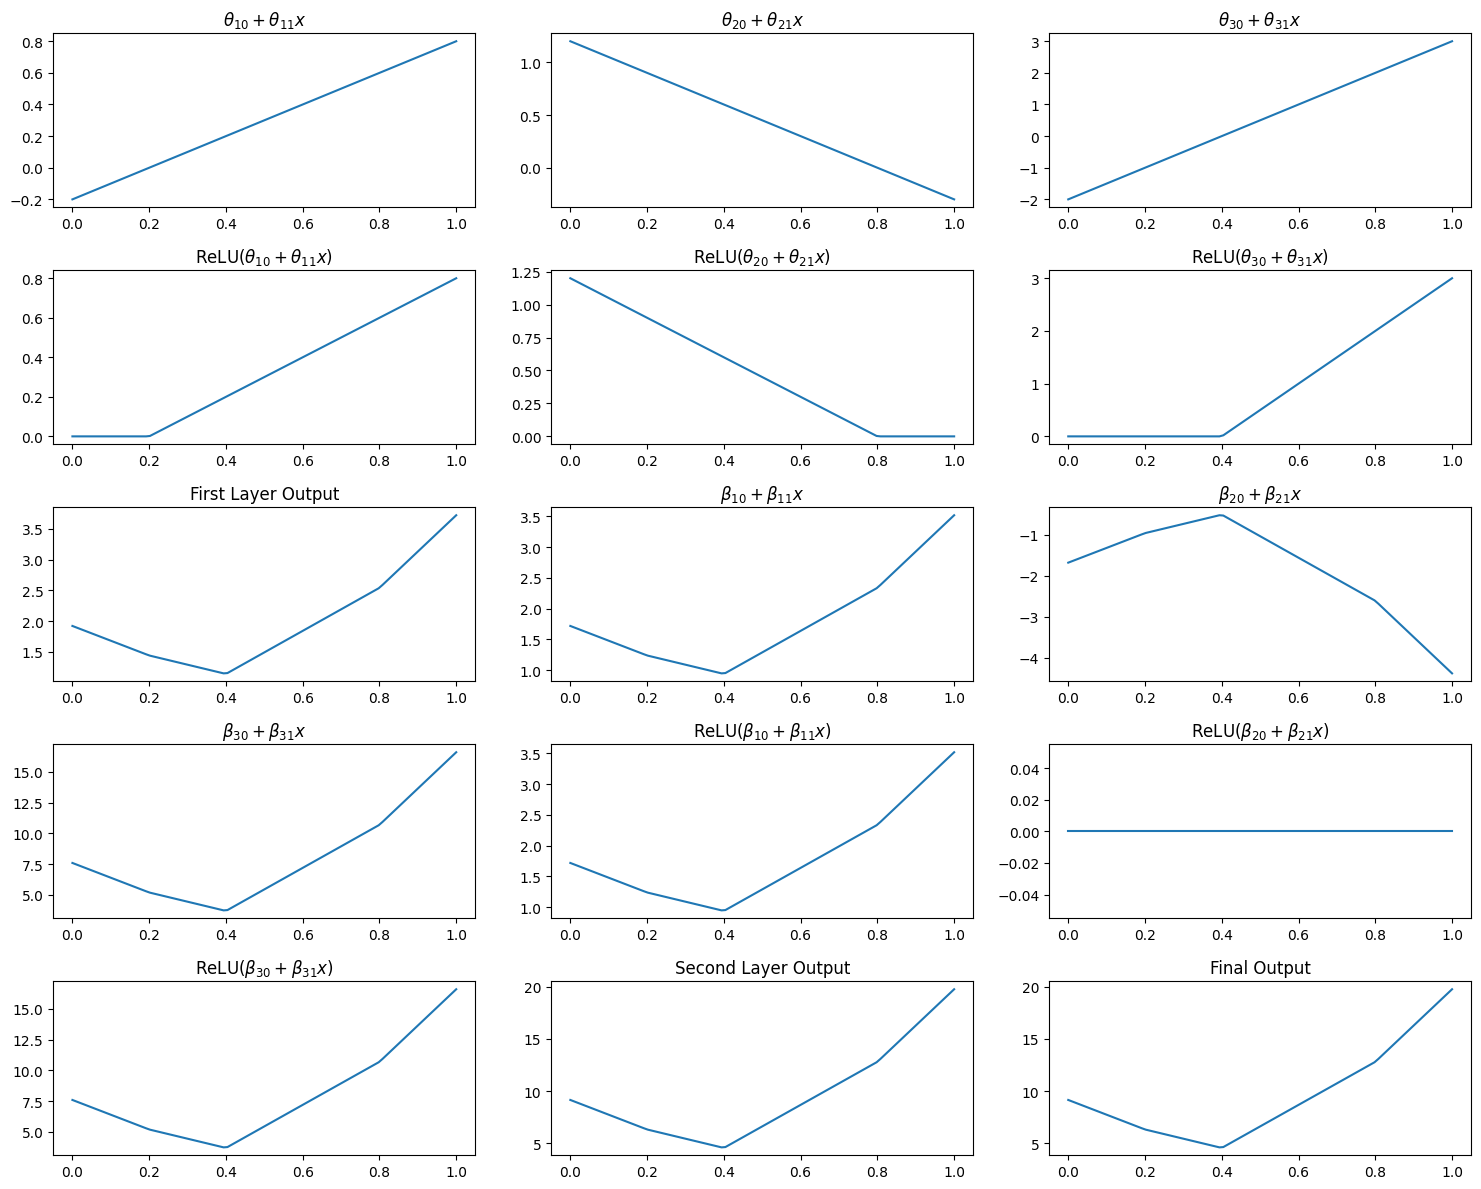

In [15]:
def relu(x):
    return np.maximum(0, x)

fig, axes = plt.subplot_mosaic(
    [
        ["pre_act1_1", "pre_act1_2", "pre_act1_3"],
        ["hidden1_1", "hidden1_2", "hidden1_3"],
        ["output1", "pre_act2_1", "pre_act2_2"],
        ["pre_act2_3", "hidden2_1", "hidden2_2"],
        ["hidden2_3", "output2", "y"]
    ],
    figsize=(15, 12),
)

# First layer pre-activations
axes["pre_act1_1"].plot(xx, pre_act_1[:, 0])
axes["pre_act1_1"].set_title(r"$\theta_{10} + \theta_{11} x$")
axes["pre_act1_2"].plot(xx, pre_act_1[:, 1])
axes["pre_act1_2"].set_title(r"$\theta_{20} + \theta_{21} x$")
axes["pre_act1_3"].plot(xx, pre_act_1[:, 2])
axes["pre_act1_3"].set_title(r"$\theta_{30} + \theta_{31} x$")

# First layer hidden activations
axes["hidden1_1"].plot(xx, hidden_1[:, 0])
axes["hidden1_1"].set_title(r"$\text{ReLU}(\theta_{10} + \theta_{11} x)$")
axes["hidden1_2"].plot(xx, hidden_1[:, 1])
axes["hidden1_2"].set_title(r"$\text{ReLU}(\theta_{20} + \theta_{21} x)$")
axes["hidden1_3"].plot(xx, hidden_1[:, 2])
axes["hidden1_3"].set_title(r"$\text{ReLU}(\theta_{30} + \theta_{31} x)$")

# First layer output
axes["output1"].plot(xx, output_1)
axes["output1"].set_title("First Layer Output")

# Second layer pre-activations
axes["pre_act2_1"].plot(xx, pre_act_2[:, 0])
axes["pre_act2_1"].set_title(r"$\beta_{10} + \beta_{11} x$")
axes["pre_act2_2"].plot(xx, pre_act_2[:, 1])
axes["pre_act2_2"].set_title(r"$\beta_{20} + \beta_{21} x$")
axes["pre_act2_3"].plot(xx, pre_act_2[:, 2])
axes["pre_act2_3"].set_title(r"$\beta_{30} + \beta_{31} x$")

# Second layer hidden activations
axes["hidden2_1"].plot(xx, hidden_2[:, 0])
axes["hidden2_1"].set_title(r"$\text{ReLU}(\beta_{10} + \beta_{11} x)$")
axes["hidden2_2"].plot(xx, hidden_2[:, 1])
axes["hidden2_2"].set_title(r"$\text{ReLU}(\beta_{20} + \beta_{21} x)$")
axes["hidden2_3"].plot(xx, hidden_2[:, 2])
axes["hidden2_3"].set_title(r"$\text{ReLU}(\beta_{30} + \beta_{31} x)$")

# Final outputs
axes["output2"].plot(xx, yy)
axes["output2"].set_title("Second Layer Output")
axes["y"].plot(xx, yy)
axes["y"].set_title("Final Output")

plt.tight_layout()
plt.show()